<h1> <center> Predicting Income Level from Census Data </center> </h1>
This is the first independent project I undertook after successfully completing Codecademy's Data Science Career Path. As per 
<a href="https://www.kaggle.com/uciml/adult-census-income">the Kaggle file description</a>,
my prediction task was to determine whether a person makes over \$50K a year (in 1994 U.S. Dollars). The data set itself was downloaded from <a href="https://www.kaggle.com/uciml/adult-census-income">this Kaggle repository</a>. It was compiled by the UCI Machine Learning group; as per their description, the "data was extracted from the <a href="http://www.census.gov/en.html">1994 Census bureau database</a> by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics)." I refer the reader to the Kaggle file description for details of the data extraction. <br> <br> 
Since the prediction task put forth by the UCI Machine Learning group was fairly well-posed (although with a bit of ambiguity regarding what "counts" as a good prediction), I decided to complete it. To do so, I needed to engage in some exploratory data analysis, as no column descriptions were provided in the Kaggle file description. (I should note that, after completing the project, I was able to find a full description of the columns in the data set in a paper by (then) UCSD students Chet Lemon, Chris Zelazo, and Kesav Mulakaluri; their paper can be found <a href="http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf"> here</a>. The link takes one directly to a PDF copy of the paper.) Once I had a basic understanding of what information was contained in each column, and what seemed to be associated with income, I decided on which features to include in my predictive supervised machine learning models. I built several models and evaluated each on the basis of precision and accuracy; I looked at the models' recalls as well, though it was not a primary criterion for model evaluation. At the end of this notebook, I decide which model is best for predicting whether or not a person makes over \$50K per year and remark on what I would do differently if I was to repeat this project. Citations follow at the very end of the notebook.

<h3> <center> Loading Libraries and Packages </center> </h3>
Several open-source libraries and specific library packages were used in this work. They must be loaded before analysis can commence.

In [1]:
# Import data manipulation libraries:
import pandas as pd
import numpy as np

# Import plotting libraries and packages:
from matplotlib import pyplot as plt
import seaborn as sns

# Import hypothesis-testing classes:
from scipy.stats import ks_2samp, chi2_contingency

In [2]:
# Import data pre-processing classes:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import supervised machine learning classification classes:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import model performance-measuring methods:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

<h3> <center> Reading in the Data and Characterizing It </center> </h3>

In [3]:
# Read in the data set downloaded from Kaggle:
census_data = pd.read_csv('adult.csv')

In [4]:
# Begin the process of making sense of the data:
print(census_data.info())
print('')
print(census_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

   age workclass  fnlwgt education  education.num marital.status  \
0   90         ?   

There are 32,561 records in the data set and 15 columns. Fortunately, there are no null/NaN values in any row or column; instead, there are several "?" entries, which I assume were filled in for null/NaN values by the compilers of the data set. Given the categorical nature of the features which contain "?" entries, I do not anticipate that their presence will affect my model building. <br>
The columns age, fnlwgt, education.num, capital.gain, capital.loss and hours.per.week are quantitative variables. In principle they are continuous quantitative variables, although in this data set they all seem to be rounded to the nearest integer. The columns education, marital.status, occupation, relationship, race, sex, native.country, and income are all categorical variables. Since sex almost certainly refers to biological sex rather than gender, it is a binary categorical variable. Whether the remaining columns contain nominal categorical data, ordinal categorical data, or binary categorical data remains to be seen.

<h3> <center> Exploratory Data Analysis </center> </h3>
Since there were no column descriptions provided in the Kaggle file description when I downloaded the data set, it is necessary to conduct exploratory data analysis to better understand the nature of the columns (beyond what data type they contain). I should note that I would be doing exploratory data analysis even if there had been column descriptions provided, as exploratory data analysis is vital to uncovering which features seem to be associated with income. It is just even more important that I do so given the specific circumstances at hand.

<h4> Looking at the Income Column </h4> <br>
Given that the column "income" is of the object data type -- and that first two income records were "<=50K" -- it is clear that this column does not contain quantitative data. Instead, it contains categorical data. Below, I investigate how many categories comprise this categorical variable, and what percentage of the data falls into each category.

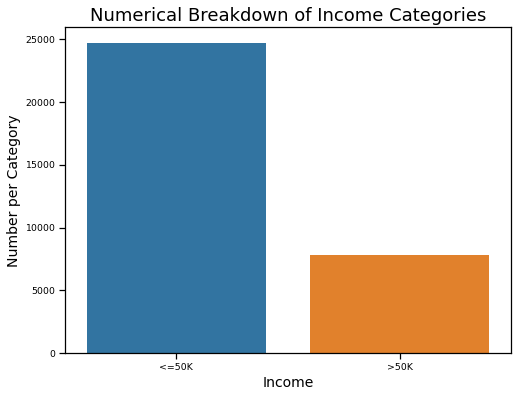

In [5]:
# Plot a bar plot of the number of records which fall into each income category:
plt.figure(figsize = (8,6))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Use Seaborn's .countplot() to construct the bar plot:
income = sns.countplot(data = census_data, x = 'income')
# Make the axis labels more prominant:
plt.xlabel('Income', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the graph a prominant title:
plt.title("Numerical Breakdown of Income Categories", fontsize=18)
# Print the graph to file:
plt.savefig('income_bar_graph.png')

"Income" is in fact a binary categorical variable, which opens up many possible supervised machine learning models aimed at predicting it. I was quite happy upon discovering the binary categorical nature of "income." <br>
I also investigated the percentage of records which fall into each "income" category, as shown below.

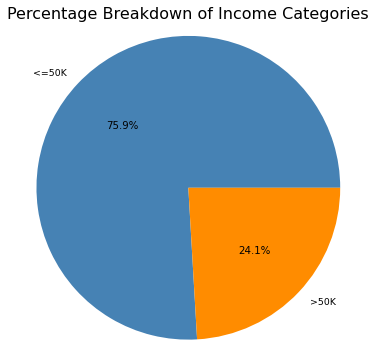

In [6]:
# Find the percentage breakdown of records in each income category:
income_pctgs = census_data.income.value_counts()/len(census_data)

# Construct a pie plot illustrating the percentage breakdown of records in each income category:
plt.figure(figsize=(6,6))
plt.pie(income_pctgs,autopct = '%1.1f%%', labels = ['<=50K','>50K'], colors = ['steelblue','darkorange'])
plt.axis('equal')
plt.title("Percentage Breakdown of Income Categories", fontsize = 16)
plt.savefig('income_pie_chart.png')

Roughly three-quarters of the people in the data set have an income less than or equal to \$50,000 per year. This will be important to bear in mind when splitting the data into training and validation sets for training my supervised machine learning models: the breakdown of incomes in each category in the training and validation sets should mirror the overall breakdown.

<h4> Looking at the Possible Association Between Hours Worked per Week and Income </h4> <br>
Having determined that "income" is a binary categorical variable, and that about one-quarter of people in the data set have an income of more than \$50,000 per year, I needed to determine which (if any) features seem to be associated with income. I first looked at "hours.per.week," which I assume is the number of hours per week that people self-reported to the census that they work. "Hours.per.week" is a quantitative variable, so to determine whether or not it is associated with income I looked at the degree of overlap between histograms of hours.per.week split by income. <br>
First, though, I plotted a histogram of hours.per.week for all records in the data set:

Text(0.5, 1.0, 'Self-Reported Hours per Week Worked, All Records')

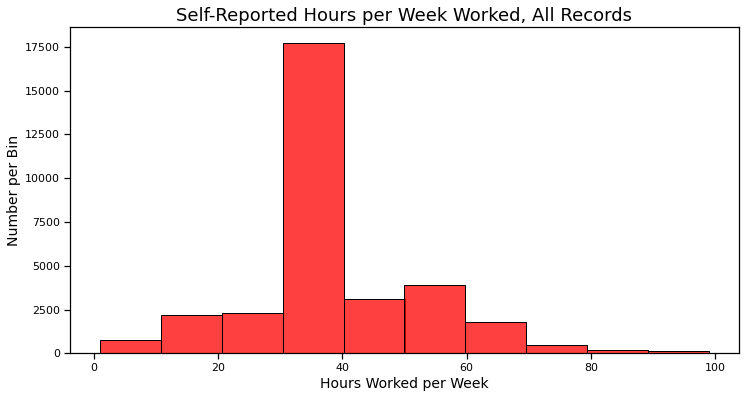

In [7]:
plt.figure(figsize=(12,6))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.5})
# Plot the histogram, manually setting the number of bins and not plotting the KDE:
hpwall = sns.histplot(data=census_data, x = 'hours.per.week', stat = 'count', color = 'red', bins = 10, kde = False)
# Make the axis labels more prominant:
plt.xlabel('Hours Worked per Week', fontsize=14)
plt.ylabel("Number per Bin", fontsize=14)
# Give the figure a prominant title:
plt.title("Self-Reported Hours per Week Worked, All Records", fontsize=18)

It is clear from the above figure that, by far and away, most people self-reported working between 30 and 40 hours per week. Given that, traditionally, full-time working hours in the U.S. are 40 hours per week, this finding does not surprise me at all. It is also unsurprising that few people worked more than 80 hours per week, and few worked less than 10 hours per week. <br>
Having plotted the distribution of hours worked per week for all data in the data set, I then plotted histograms of self-reported hours per week worked split by income. The result is shown below.

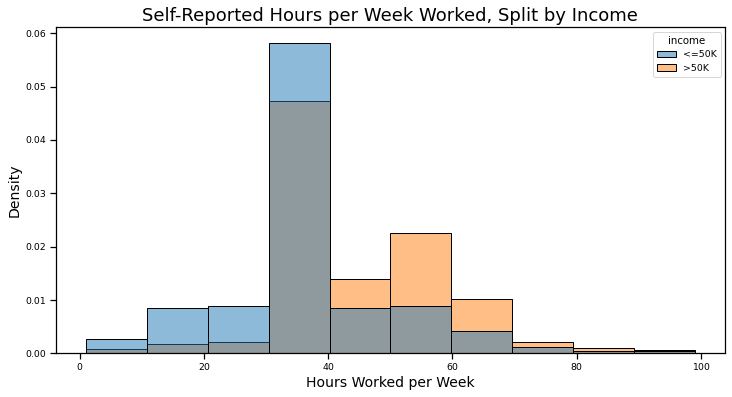

In [8]:
plt.figure(figsize=(12,6))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot the histogram as a density, manually setting the number of bins and not plotting the KDE:
hpwsplit = sns.histplot(data=census_data, x = 'hours.per.week', hue = 'income', stat = 'density', \
                        common_norm = False, bins = 10, kde = False, legend = True)
# Make the axis labels more prominant:
plt.xlabel('Hours Worked per Week', fontsize=14)
plt.ylabel("Density", fontsize=14)
# Give the figure a prominant title:
plt.title("Self-Reported Hours per Week Worked, Split by Income", fontsize=18)
# Print the graph to file:
plt.savefig('hours_per_week_bar_chart.png')

The "density" option normalizes each histogram independently (when keyword "common_norm" is set to false) such that the area under each histogram is 1. <br>
It is clear that there is some overlap between the histograms, but that more people with higher incomes reported working more hours per week. In other words, while both distributions peak at the 30-40 hours per week bin, the higher income distribution has an additional secondary peak between 50 and 60 hours per week that the lower income distribution lacks. Also worth noting is that more people with lower incomes self-reported working fewer hours per week. The differences between the histograms point to hours worked per week and income being associated.

I explored the latter point a bit further by performing a Two-Sample Kolmogorov-Smirnov (K-S) test on the two distributions plotted above. This hypothesis test was chosen because the data are clearly not normally distributed, and a two-sample K-S test is non-parametric and does not require the sample sizes to be identical. (A very good explanation of what precisely a two-sample K-S test is, as well as how to implement one with Microsoft Excel, can be found <a href = "https://www.real-statistics.com/non-parametric-tests/goodness-of-fit-tests/two-sample-kolmogorov-smirnov-test/">here</a>.) The null hypothesis in this case is that both measured distributions of hours worked per week are in fact drawn from the same distribution; the alternate hypothesis is that both measured distributions are <b>not</b> drawn from the same distribution. I choose as my significance threshold a value of 0.001 to be extremely conservative.

In [9]:
# Split the data by income:
low_income = census_data[census_data.income == '<=50K']
high_income = census_data[census_data.income == '>50K']

# Conduct the two-sample K-S test:
ksstat_hrsinc, kspval_hrsinc = ks_2samp(low_income['hours.per.week'], high_income['hours.per.week'])
# Report the result:
print('K-S test p-value for income levels hours worked per week test: '+ str(kspval_hrsinc))

K-S test p-value for income levels hours worked per week test: 0.0


According to <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html"> the SciPy documentation </a>, the minimum probability ks_2samp() can return is about $1 \times 10^{-16}$, so it is quite likely that the true p-value is not in fact zero but simply falls below the minimum value that ks_2samp() can return. In any event, the reported p-value clearly falls below my pre-chosen significance threshold, so I reject the null hypothesis and conclude that the two measured distributions are drawn from different underlying distributions. <br>
While looking at the overlap between the two measured hours worked per week histograms is the best way to determine if there seems to be an association between hours.per.week and income, the results of the two-sample K-S test also indicate that the two features seem to be associated.

<h4> Looking at Possible Association Between Sex and Income </h4> <br>
I next looked at whether or not sex (biological sex) seems to be associated with income. First, I wanted to see what the percentage breakdown of records by sex was. I do this below.

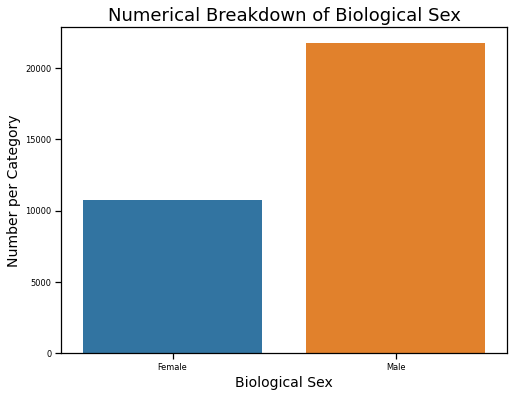

In [10]:
plt.figure(figsize=(8,6))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
sns.countplot(data = census_data, x = 'sex')
# Make the axis labels more prominant:
plt.xlabel('Biological Sex', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the figure a prominant title:
plt.title("Numerical Breakdown of Biological Sex", fontsize=18)
# Print the graph to file:
plt.savefig('sex_bar_graph.png')

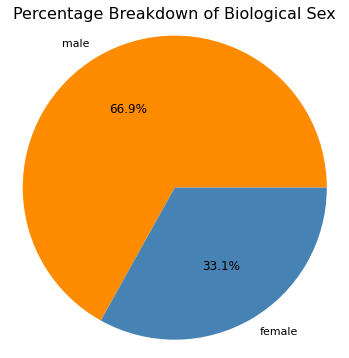

In [11]:
# Find the percentage breakdown of records by sex:
sex_pctgs = census_data.sex.value_counts()/len(census_data)

# Construct a pie plot illustrating the percentage breakdown of records by sex:
plt.figure(figsize=(6,6))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.5})
plt.pie(sex_pctgs,autopct = '%1.1f%%', labels = ['male','female'], colors = ['darkorange','steelblue'])
plt.axis('equal')
plt.title("Percentage Breakdown of Biological Sex", fontsize = 16)
# Print the graph to file:
plt.savefig('sex_pie_chart.png')

About 2/3 of the records are male and about 1/3 are female. This was important to know because I wanted to make a bar plot of the number of males and females in each income category; since there are so many more males than females, the raw counts of males in each income category would of course be greater because there are more males overall. Instead, I needed to make a bar plot of the percentage of males/females in each income category in order to show a fairer comparison. I do this below. 
<br>
But first, I illustrate the above point: given the larger number of males overall, there are more males in each income category than there are females. This complicates a visual comparison of the number of each sex split by income.

Text(0.5, 1.0, 'A Bad Bar Plot of Sex Split by Income')

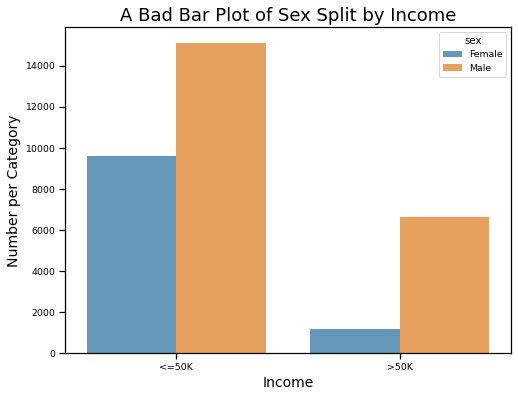

In [12]:
# Construct a bar plot illustrating the percentage breakdown of records in each income category:
plt.figure(figsize=(8,6))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# plot a bar chart of counts per category:
sns.countplot(data = census_data, x = 'income', hue = 'sex', alpha = 0.75)
# Make the axis labels more prominant:
plt.xlabel('Income', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot a prominant, informative title:
plt.title("A Bad Bar Plot of Sex Split by Income", fontsize=18)

Now I make a bar plot showing the more informative comparison between the fraction of males/females in each income category:

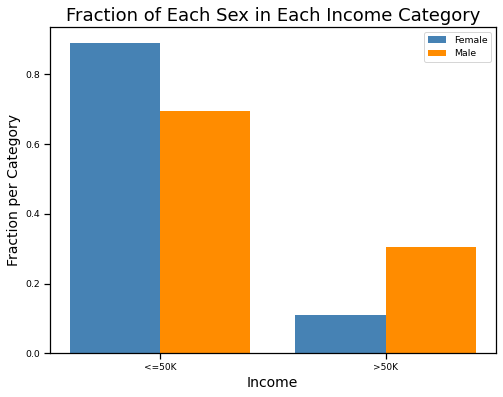

In [13]:
# Split the data by sex:
m_census_data = census_data[census_data.sex == 'Male']
f_census_data = census_data[census_data.sex == 'Female']

# The following code is borrowed from Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first sub-sample 
t = 2 # Number of sub-samples 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second subsample 
t = 2 # Number of sub-samples 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

# Find the bar edge common to both male and female bars and arrange to put the horizontal axis labels there:
centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

# Set the figure size:
plt.figure(figsize=(8,6))
ax = plt.subplot()
# Plot bar plots of male percentages and female percentages split by income:
plt.bar(xvalues1, f_census_data.income.value_counts()/len(f_census_data), color = 'steelblue')
plt.bar(xvalues2, m_census_data.income.value_counts()/len(m_census_data), color = 'darkorange')
# Set the x-axis tickmarks and label them:
ax.set_xticks(centers)
ax.set_xticklabels(["<=50K", ">50K"], fontsize = 9)
# Make a legend:
plt.legend(['Female','Male'])
# Make the axis labels more prominant:
plt.xlabel('Income', fontsize=14)
plt.ylabel("Fraction per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Fraction of Each Sex in Each Income Category", fontsize=18)
# Print the graph to file:
plt.savefig('sex_income_bar_graph.png')
# Display the plot:
plt.show()

This plot makes it easy to see that a small percentage of females earn over \\$50,000 per year. A much larger percentage of males earn over \\$5,000K per year. Also, a higher percentage of females earn less than or equal to \\$50,000 per year. 
<br>
From the above bar plots, it is clear to me that sex and income are associated. To be sure, I perform a chi-squared test on the two features. The null hypothesis is that the features are <b>not</b> associated; the alternative hypothesis is that they are associated. I choose as my significance threshold a value of 0.001.

In [14]:
# Cross-tabulate sex and income data; this is the "contingency" table to be passed to chi2_contingency:
sex_income_crosstab = pd.crosstab(census_data.sex, census_data.income)

# Run the chi-squared hypothesis test and report the resulting p-value:
chi2_si, pvalue_si, dof_si, expect_si = chi2_contingency(sex_income_crosstab)
print('Chi-square p-value for sex/income association: '+ str(pvalue_si))

Chi-square p-value for sex/income association: 0.0


Even though <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html"> the SciPy documentation </a> doesn't say so, I suspect that there is a minimum p-value that chi2_contingency() can report; given that the smallest p-value that ks_2samp() can report is about $1 \times 10^{-16}$, it is reasonable to assume that the smallest p-value that chi2_contingency() can report is of the same magnitude. Hence, it is extremely unlikely that the true p-value of the chi-squared test I performed on the data is actually zero, it is just too small to be reported. <br>
Given the above, it is clear that the null hypothesis can be rejected; hence I conclude that sex and income are indeed associated.

<h4> Looking at the Possible Association Between Education and Income </h4>

I next looked at whether or not education level seems to be associated with income. The first step in this process was to ascertain the relationship between the columns "education" and "education.num:" they are clearly related, but is "education" in fact an ordinal categorical variable that can be mapped to an integer, in the same order that "education.num" is ordered? It seemed reasonable that "education.num" is just a numerical mapping of the "education" feature, but I did not want to make that assumption without first testing it.

In [15]:
# Print out the value counts (name of category and number per category) of both "education" and "education.num." 
# I assume that if number per category matches up between "education" and "education.num" that the two category
# names are in fact equivalent.
print('"education" value counts:')
print(census_data.education.value_counts())
print('')
print('"education.num" value counts:')
print(census_data['education.num'].value_counts())
# Make sure that the number of categories is the same for each column:
print('')
print('"education" number of categories, "education.num" number of categories:')
print(census_data.education.nunique(), census_data['education.num'].nunique())

"education" value counts:
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

"education.num" value counts:
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

"education" number of categories, "education.num" number of categories:
16 16


From the above, I determined that correspondence between "education" and "education.num" is as follows: <br>
1 -- Preschool <br>
2 -- 1st - 4th <br>
3 -- 5th - 6th <br>
4 -- 7th - 8th <br>
5 -- 9th <br>
6 -- 10th <br>
7 -- 11th <br>
8 -- 12th <br>
9 -- HS-grad <br>
10 -- Some-college <br>
11 -- Assoc-voc <br>
12 -- Assoc-acdm <br>
13 -- Bachelors <br>
14 -- Masters <br>
15 -- Prof-school <br>
16 -- Doctorate <br>
<br>
Thus, "education" is indeed an ordinal categorical variable, with the natural order of highest education level achieved reflected in the column order above. In other words, the data set compilers were kind enough to map "education" to an integer for me; that is what "education.num" represents. This saves me the trouble of doing so before I pass the data to a supervised machine learning model.
<br>
It seems reasonable to assume that, if the data set compilers went through the trouble of mapping "education" to "education.num," education and income are associated. But I should test this for myself rather than just relying on assumptions. First, I plot a bar plot of the number of people who fall into each education category.

Text(0.5, 1.0, 'Numerical Breakdown of Records per Education Category')

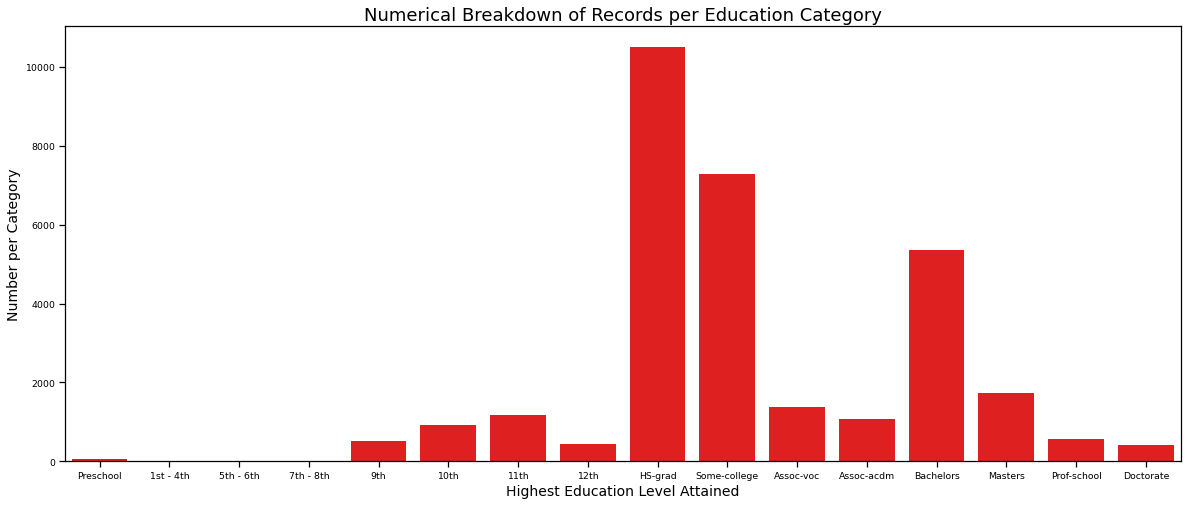

In [16]:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each education category, brow-beating Seaborn into 
# plotting the categories in their natural order:
sns.countplot(data=census_data, x = 'education', order = ['Preschool', '1st - 4th', '5th - 6th', '7th - 8th', \
                                                          '9th', '10th', '11th', '12th', 'HS-grad', \
                                                          'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', \
                                                          'Masters', 'Prof-school', 'Doctorate'], color = 'red')

# Make the axis labels more prominant:
plt.xlabel('Highest Education Level Attained', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Education Category", fontsize=18)

As one might expect, the vast majority of people either earned a high school diploma and didn't pursue further education, or earned a high school diploma and took some college classes. There were a significant number of college graduates as well. Very few people attained a highest level of education which stopped before graduating high school; a significant minority of people earned an associate's degree of some sort; and very few people attained higher levels of education than college. <br>
I then investigated how the above broke down by income level:

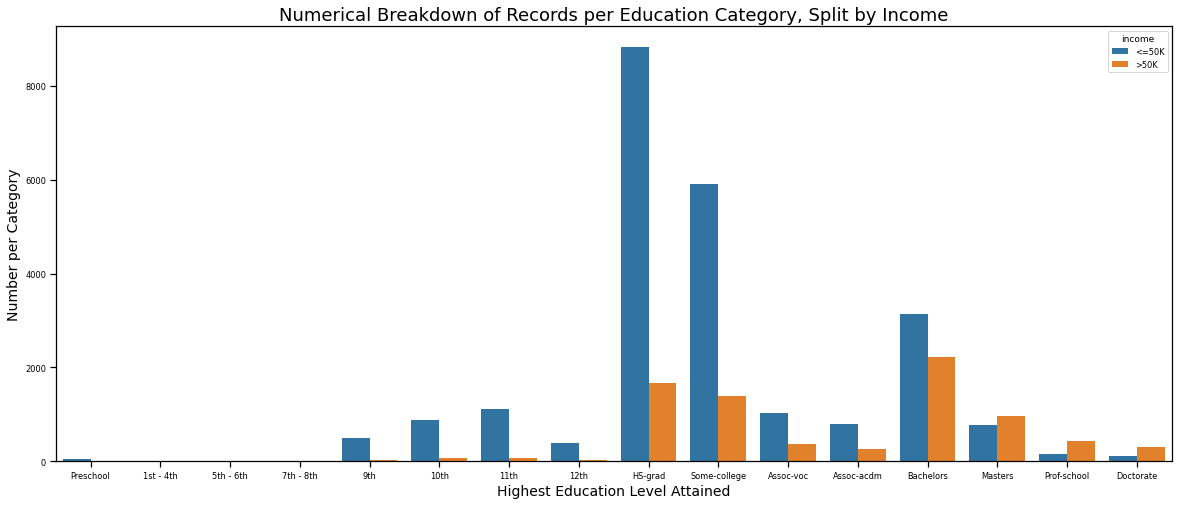

In [17]:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each education category, split by income level, and
# brow-beat Seaborn into plotting the education categories in their natural order:
sns.countplot(data=census_data, x = 'education', hue = 'income',
              order = ['Preschool', '1st - 4th', '5th - 6th', '7th - 8th', '9th', '10th', '11th', '12th', 'HS-grad',\
                       'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'])
# Make the axis labels more prominant:
plt.xlabel('Highest Education Level Attained', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Education Category, Split by Income", fontsize=18)
# Print the graph to file:
plt.savefig('education_income_bar_graph.png')

The above bar plot is clearly flawed; recall that about 75% of people in the data set make under \$50,000 per year, so there are far more low-income records than there are high-income records. What I really should have done is plot the fraction of records in each education category split by income, but the process of doing this is a bit cumbersome. It was much easier to ask Seaborn to plot the raw counts, so that is what I did. Even though the histogram is flawed, one trend is apparent: the higher the education level, the higher the income. Indeed, even given the raw number disparity between low- and high-income records, there were more high-income records with Masters, Professional School, and Doctorate degrees than there were low-income records. Maximum education level attained and income seem to be associated. <br>
I once again tested this assertion with a chi-squared test. The null hypothesis is that education and income are <b>not</b> associated; the alternate hypothesis is that they are. I take as my significance threshold a value of 0.001.

In [18]:
# Cross-tabulate sex and income data; this is the "contingency" table to be passed to chi2_contingency:
edu_income_crosstab = pd.crosstab(census_data.education, census_data.income)

# Run the chi-squared hypothesis test and report the resulting p-value:
chi2_edi, pvalue_edi, dof_edi, expect_edi = chi2_contingency(edu_income_crosstab)
print('Chi-square p-value for education/income association: '+ str(pvalue_edi))

Chi-square p-value for education/income association: 0.0


Once again, it is extremely unlikely that the true p-value of the chi-squared test that I performed on the data is actually zero; it is almost certainly just too small to be reported. It is clear that the null hypothesis can be rejected; hence I conclude that education level and income are indeed associated.

<h4> Looking at the Possible Association Between Capital Gain and Income </h4> <br>
The next feature I looked at was "capital.gain," which I assume to mean capital gains. According to <a href="https://www.investopedia.com/terms/c/capitalgain.asp">Investopedia</a>, capital gains refer to an increase in a capital asset's value and can be short-term or long-term. They are usually associated with stocks and funds, but can also be realized on any security which sells at a higher price than its purchase price (source: <a href="https://www.investopedia.com/terms/c/capitalgain.asp">Investopedia</a>.) It seems reasonable that there would be an association between capital gains and income, as it was quite unlikely in the 1990s for anyone of lower income to hold stocks, funds, or other capital assets. First, I plotted a histogram of all "capital.gain" values; this histogram is illustrated below

Text(0.5, 1.0, 'Distribution of Capital Gains')

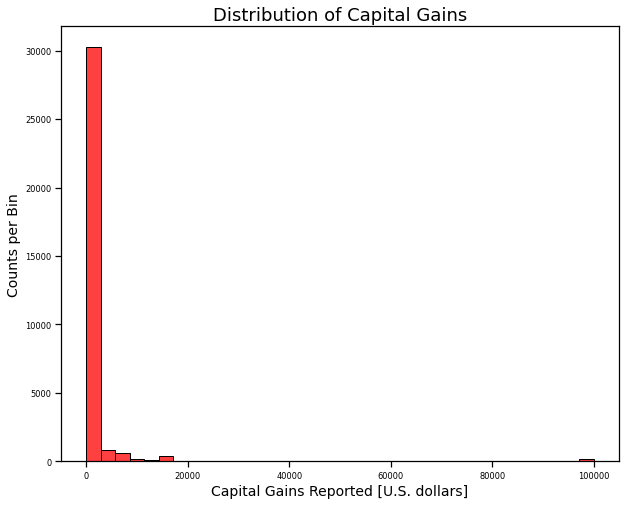

In [19]:
plt.figure(figsize=(10,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Plot the histogram, manually setting the number of bins and not plotting the KDE:
sns.histplot(data=census_data, x = 'capital.gain', stat = 'count', color = 'red', \
             common_norm = False, bins = 35, kde = False, legend = True)
# Make the axis labels more prominant:
plt.xlabel('Capital Gains Reported [U.S. dollars]', fontsize=14)
plt.ylabel("Counts per Bin", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Distribution of Capital Gains", fontsize=18)

From the histogram, it can be readily seen that the vast majority of people see little to no capital gains. Of those that do see capital gains, most gains are below \\$20,000; however, a small minority of people saw very large capital gains. <br>
Next, I split capital gains by income level and plot the capital gains distribution for each income level. Note that density was plotted rather than counts, as there are more low-income records than high-income records.

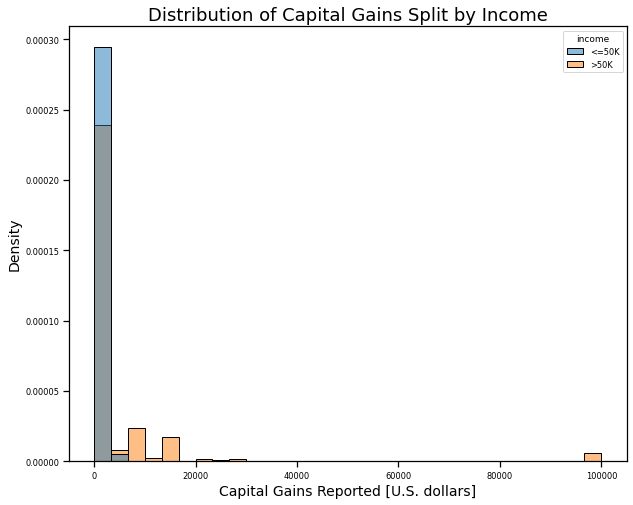

In [20]:
plt.figure(figsize=(10,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Plot the histogram for each income level, manually setting the number of bins and not plotting the KDE:
sns.histplot(data=census_data, x = 'capital.gain', hue = 'income', stat = 'density', \
             common_norm = False, bins = 30, kde = False, legend = True)
# Make the axis labels more prominant:
plt.xlabel('Capital Gains Reported [U.S. dollars]', fontsize=14)
plt.ylabel("Density", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Distribution of Capital Gains Split by Income", fontsize=18)
# Print the graph to file:
plt.savefig('cap_gains_income_bar_graph.png')

Almost all low-income people fell into the smallest-valued capital gains bin; only a few saw any capital gains at all, and those that did saw a maximum gain of about \\$5,000 or so. Most high-income people also fell into the smallest-valued capital gains bin, but it is worth noting that only high-income people realized capital gains above \\$10,000 or so. <br>
The above distributions provide strong evidence that capital gains are associated with income.

<h4> Looking at the Possible Association Between Capital Loss and Income </h4> <br>
Next, I looked at how the feature "capital.loss" might be associated with income. According to <a href="https://www.investopedia.com/terms/c/capitalgain.asp">Investopedia</a>, capital losses occur when there is a decrease in a capital asset's value compared to that asset's purchase price. Since capital gains and capital losses are so closely related, and I found above that capital gains and income are associated, it stands to reason that capital losses should also be associated with income. I test this hypothesis below (not with an actual hypothesis test; just by comparing histogram overlap).

Text(0.5, 1.0, 'Distribution of Capital Losses')

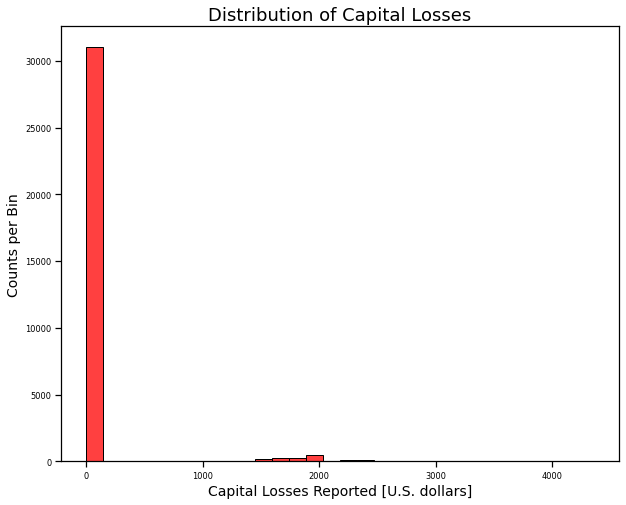

In [21]:
plt.figure(figsize=(10,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Plot the histogram, manually setting the number of bins and not plotting the KDE:
sns.histplot(data=census_data, x = 'capital.loss', stat = 'count', color = 'red', \
             common_norm = False, bins = 30, kde = False, legend = True)

# Make the axis labels more prominant:
plt.xlabel('Capital Losses Reported [U.S. dollars]', fontsize=14)
plt.ylabel("Counts per Bin", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Distribution of Capital Losses", fontsize=18)

The vast majority of people saw little to no capital losses. A small minority of people saw capital losses of about \\$20,000; there seems to be a small peak in the distribution centered on this value. <br>
Next, I split capital losses by income level and plot the capital loss distribution for each income level. Note that once again density will be plotted rather than counts, because there are more low-income records than high-income records.

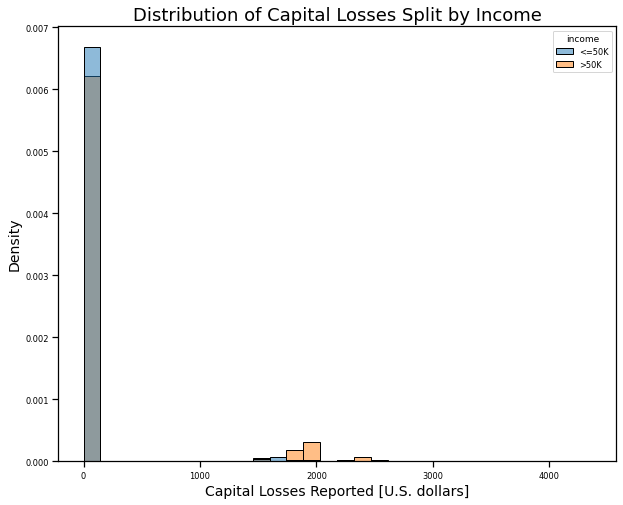

In [22]:
plt.figure(figsize=(10,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Plot the histogram for each income level, manually setting the number of bins and not plotting the KDE:
sns.histplot(data=census_data, x = 'capital.loss', hue = 'income', stat = 'density', \
             common_norm = False, bins = 30, kde = False, legend = True)
# Make the axis labels more prominant:
plt.xlabel('Capital Losses Reported [U.S. dollars]', fontsize=14)
plt.ylabel("Density", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Distribution of Capital Losses Split by Income", fontsize=18)
# Print the graph to file:
plt.savefig('cap_losses_income_bar_graph.png')

Once again, the vast majority of low-income and high-income people saw little to no capital losses; the smallest-valued bin is clearly the most heavily populated bin. A small minority of low-income people saw capital losses of about \\$15,000 or so, but nothing above that. However, there are two small peaks in the capital losses distribution of high-income people; one occurs at around \\$20,000 in losses and the other at about \\$25,000 in losses. From this observation, I conclude that capital losses and income are associated.

<h4> Looking at the Possible Association Between Age and Income </h4> <br>
The last quantitative variable I looked at was age. I would expect age and income to be associated, as older, more experienced individuals tend to earn more money and have higher ranking jobs than younger, less experienced individuals. I test this hypothesis below (this time using an actual hypothesis test). First, though, I plot a histogram of the distribution of ages in the data set.

Text(0.5, 1.0, 'Distribution of Ages')

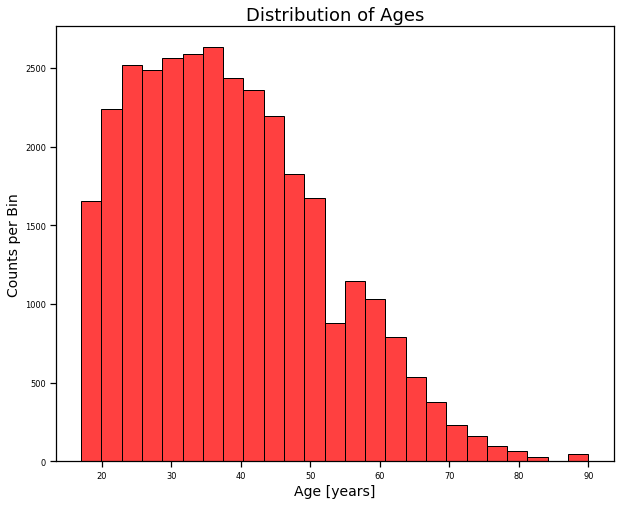

In [23]:
plt.figure(figsize=(10,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Plot the histogram, manually setting the number of bins and not plotting the KDE:
sns.histplot(data=census_data, x = 'age', stat = 'count', color = 'red', \
             common_norm = False, bins = 25, kde = False, legend = True)
# Make the axis labels more prominant:
plt.xlabel('Age [years]', fontsize=14)
plt.ylabel("Counts per Bin", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Distribution of Ages", fontsize=18)

The distribution is clearly not normally distributed, and nor should not be; there should be a sharp cut-off at either the minimum age to respond to the census or the minimum legal working age, whichever is larger. I see such a cut-off in the data above. There is a broad peak between ages of about 25 and 45 years old, and a decay in counts at older ages. (I do not believe that the dip seen between ages 50 and 60 is significant.) <br>
Next, I split the age distribution by income level to see if there is a difference between the two resulting distributions. The result can be found below. I again plot density rather than counts per bin because of the larger number of low-income records in the data.

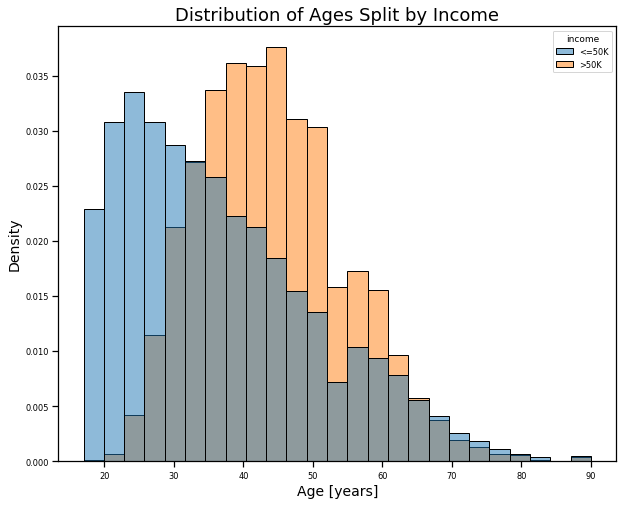

In [24]:
plt.figure(figsize=(10,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Plot the histogram for each income level, manually setting the number of bins and not plotting the KDE:
sns.histplot(data=census_data, x = 'age', hue = 'income', stat = 'density', \
             common_norm = False, bins = 25, kde = False, legend = True)
# Make the axis labels more prominant:
plt.xlabel('Age [years]', fontsize=14)
plt.ylabel("Density", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Distribution of Ages Split by Income", fontsize=18)
# Print the graph to file:
plt.savefig('ages_income_bar_graph.png')

There is a clear difference in the two age distributions. The age distribution of high-income records is not quite normally distributed--it is skewed in that there is a sharp growth at younger ages but a more gradual drop-off at higher ages--but there is a clear peak between ages of about 35 and 55 years old. The age distribution of low-income records shows evidence of a young age cut-off as described above; the peak of the distribution is at about 25 years old, and there is a slow decay as age increases. <br>
In short, the shapes of the low-income and high-income age distributions are different and they peak at different ages; hence, there seems to be an association between age and income. <br>
I chose to perform a two-sample K-S test to further investigate the hypothesis that age and income are associated. The null hypothesis in this case is that both measured sub-sample distributions of ages are in fact drawn from the same distribution; the alternate hypothesis is that both measured sub-sample distributions are <b>not</b> drawn from the same distribution. I once again choose as my significance threshold a value of 0.001.

In [25]:
ksstat_ageinc, kspval_ageinc = ks_2samp(low_income['age'], high_income['age'])
print('K-S test p-value for income levels age test: '+ str(kspval_ageinc))

K-S test p-value for income levels age test: 0.0


Remembering that the minimum probability ks_2samp() can return is about $1 \times 10^{-16}$, it is quite likely that the true p-value of the test is not in fact zero but simply falls below the minimum value that ks_2samp() can return. The reported p-value clearly falls below my pre-chosen significance threshold, so I reject the null hypothesis and conclude that the two measured sub-sample distributions are drawn from different distributions. Age and income level are associated.

<h4> Looking at the Association Between Relationship and Income </h4> <br>
For the sake of completeness, I round out my exploratory data analysis of this data set with an investigation of several nominal categorical variables and how they seem to be associated with income level. Nominal categorical variables such as "relationship," "marital.status," "race," "workclass," "occupation," and "native.country" do not have an intrinsic order to them, which makes it impossible to map them to an integer value. Thus, these features cannot be included in the supervised machine learning models of income that I will be building, as the models I will consider all rely on quantitative input data. Nonetheless, it is possible that some of these nominal categorical variables could be associated with income, so it is worth investigating them. <br>
First, I look for a possible association between "relationship" and income level. I began by plotting a bar chart of the "relationship" feature. Before I read the <a href="http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf"> paper</a> by (then) UCSD students Chet Lemon, Chris Zelazo, and Kesav Mulakaluri, I didn't understand what precisely the "relationship" categories meant; but according to them, "relationship represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status." (Source: <a href="http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf">http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf</a>.) I note that, if "relationship" is in fact somewhat redundant with "marital.status," this makes the two features dependent on each other and thus they should not be included in any machine learning model of income.

Text(0.5, 1.0, 'Numerical Breakdown of Records per Relationship Category')

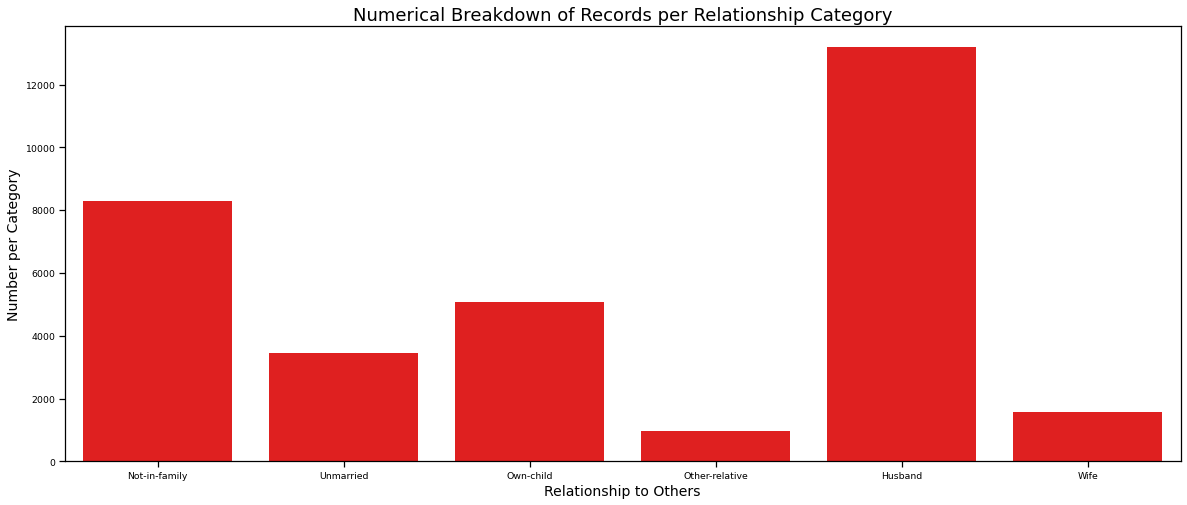

In [26]:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each relationship category:
sns.countplot(data=census_data, x = 'relationship', color = 'red')
# Make the axis labels more prominant:
plt.xlabel('Relationship to Others', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Relationship Category", fontsize=18)

It is unclear what conclusions can be drawn from the above bar plot other than that a majority of people report themselves as being married. <br>
Upon splitting the "relationship" feature by income level, the following bar plot was obtained:

Text(0.5, 1.0, 'Numerical Breakdown of Records per Relationship Category Split by Income')

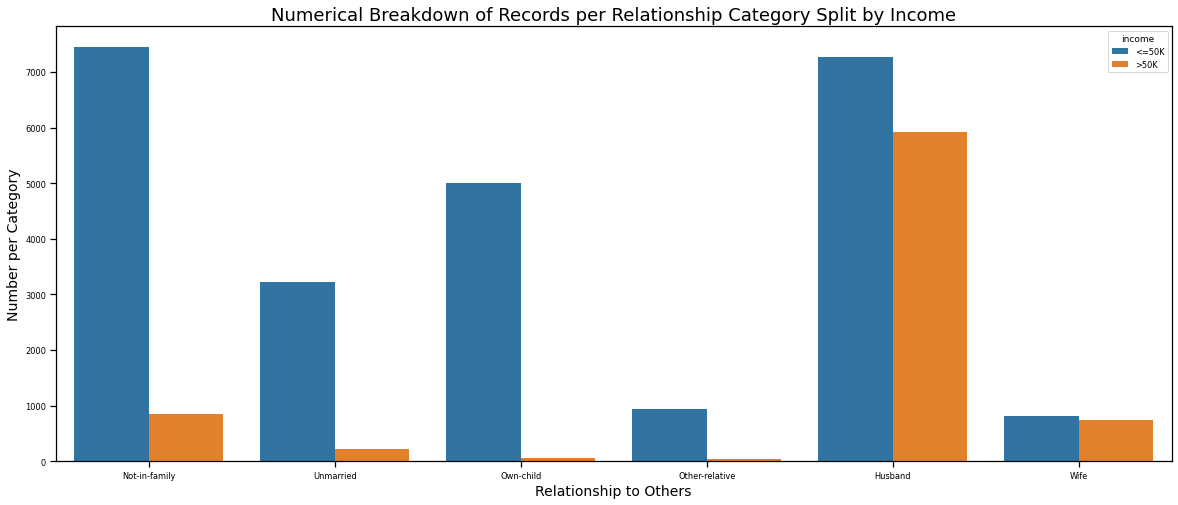

In [27]:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each relationship category, split by income level:
sns.countplot(data=census_data, x = 'relationship', hue = 'income')
# Make the axis labels more prominant:
plt.xlabel('Relationship to Others', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Relationship Category Split by Income", fontsize=18)

It should be noted that the above bar plot shows counts per category, so when interpreting it one needs to bear in mind that there are more low-income records than high-income records. Regardless, the clear majority of high-income people identify either as a husband or wife; that is to say, they are married. Comparatively few unmarried, "not-in-family," own-child", or "other-relative" people fall into the high-income category.

<h4> Looking at the Association Between Marital Status and Income </h4> <br>
The nominal categorical variable "marital.status," which I assume means marital status, may be dependent on "relationship" as noted above. I briefly investigated the association between marital status and income, noting that the possible interdependency with relationship means that both columns are ill-suited to be included in machine learning models of income level. First, a bar plot of marital status <b>not</b> split by income was constructed.

Text(0.5, 1.0, 'Numerical Breakdown of Records per Marital Status Category')

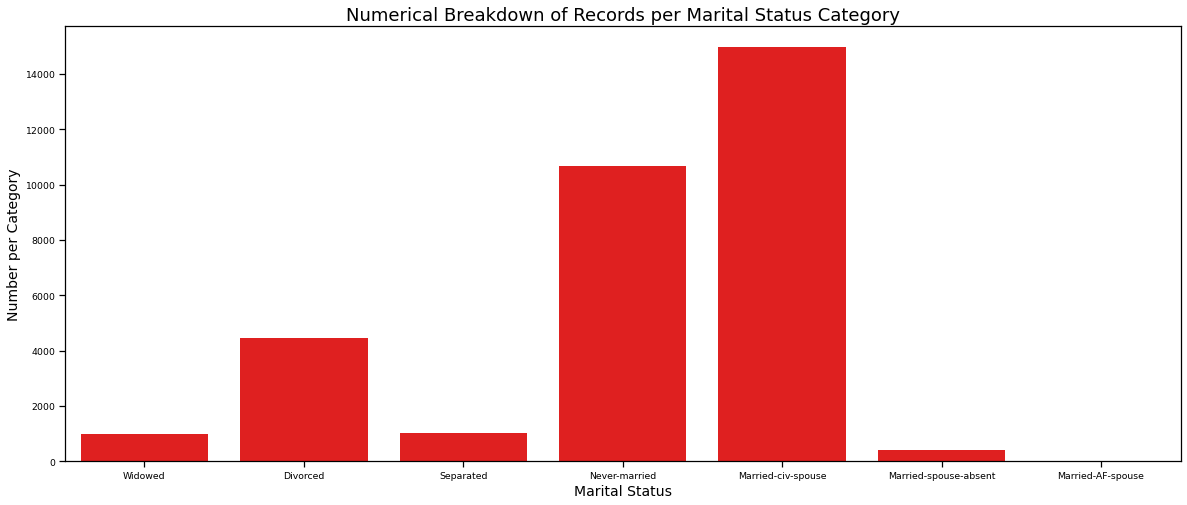

In [28]:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each marital.status category:
sns.countplot(data=census_data, x = 'marital.status', color = 'red')
# Make the axis labels more prominant:
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Marital Status Category", fontsize=18)

According to the <a href="http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf"> paper</a> by (then) UCSD students Chet Lemon, Chris Zelazo, and Kesav Mulakaluri, "civ" means "civilian," whereas "AF" means "armed forces." That is to say, those who had a spouse in the armed forces were counted differently from those who had a spouse, but that spouse was not in the armed forces. Married people form the majority of records; the next most numerous category was never married. <br>
Upon splitting the records by income level, the following bar plots of marital status were obtained:

Text(0.5, 1.0, 'Numerical Breakdown of Records per Martial Status Category Split by Income')

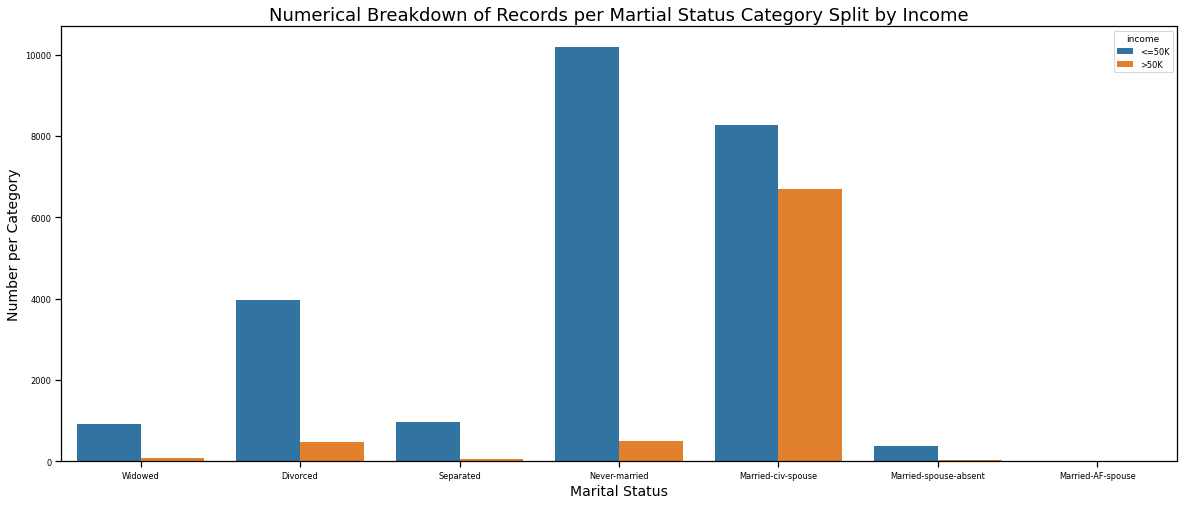

In [29]:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each marital.status category, split by income level:
sns.countplot(data=census_data, x = 'marital.status', hue = 'income')
# Make the axis labels more prominant:
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Martial Status Category Split by Income", fontsize=18)

Once again, I note that the above bar plot shows counts per category, so when interpreting it one needs to bear in mind that there are more low-income records than high-income records. However, it is clear that the majority of high-income people are married to a civilian spouse. 

<h4> Looking at the Association Between Race and Income </h4> <br>
The nominal categorical variable "race" clearly cannot be mapped to a quantitative value for inclusion in the supervised machine learning models I will be constructing; however, sadly, I know there to be an association between race and income. As I did above, I first plot a bar plot of race <b>not</b> split by income to get a rough idea of how many people of each race were included in the census data:

Text(0.5, 1.0, 'Numerical Breakdown of Records per Race Category')

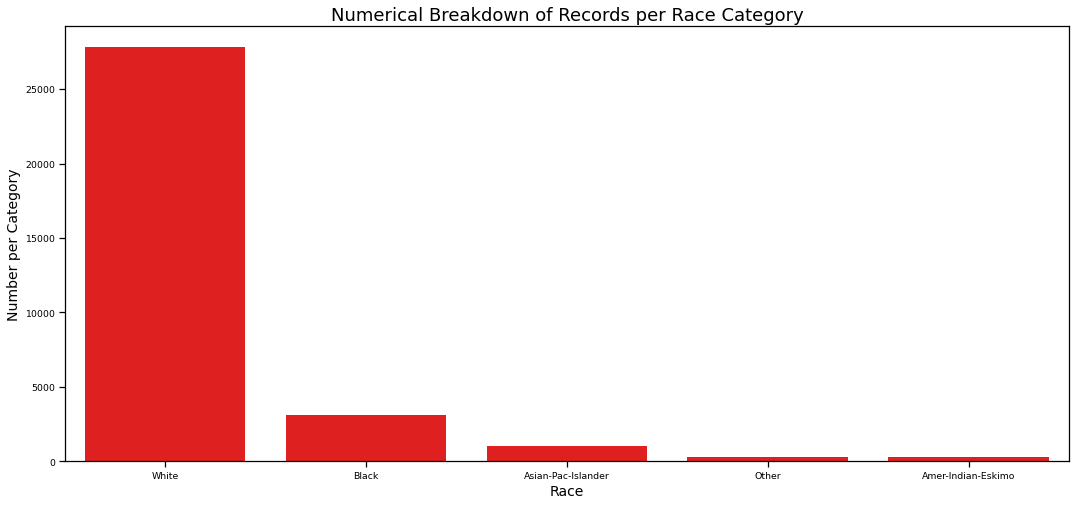

In [30]:
plt.figure(figsize=(18,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each race category:
sns.countplot(data=census_data, x = 'race', color = 'red')
# Make the axis labels more prominant:
plt.xlabel('Race', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Race Category", fontsize=18)

The vast majority of records are identified as "White." It is not clear to me if Hispanic peoples were asked to record their race as "White" or as "Other;" the inclusion or non-inclusion of Hispanic peoples in the "White" category could impact the interpretation of bar plots broken down by income level. <br>
The bar plots of race broken down by income category are as follows:

Text(0.5, 1.0, 'Numerical Breakdown of Records per Race Category Split by Income')

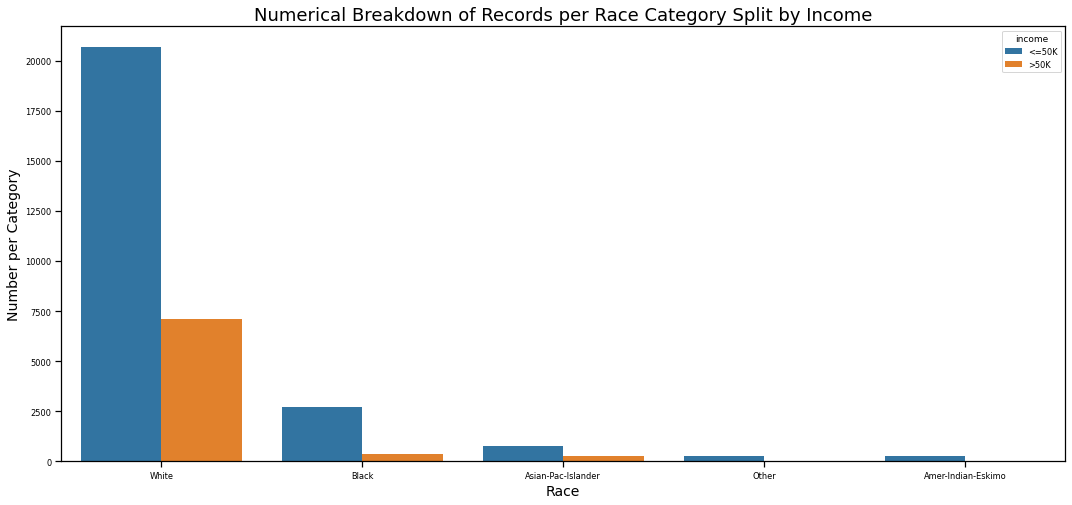

In [31]:
plt.figure(figsize=(18,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each race category, split by income level:
sns.countplot(data=census_data, x = 'race', hue = 'income')
# Make the axis labels more prominant:
plt.xlabel('Race', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Race Category Split by Income", fontsize=18)

Again, care needs to be taken in interpreting this bar plot, as raw counts are being plotted rather than proportions and there are many more "White" records than there are records in any other race category. However, the majority of high-income records fall into the "White" race category. By proportion, it looks as though the "white" race category has the highest proportion of high-income records, though it seems to be followed closely by the "Asian-Pac-Islander" category. The "Other" and "Amer-Indian-Eskimo" categories seem to have the smallest proportion of high-income records. <br>
To provide evidence of my assertion that there is an association between race and income, I perform a chi-squared test on the race and income data in this census data set. The null hypothesis of this chi-squared test is that race and income are <b>not</b> associated; the alternate hypothesis is that they are. I take as my significance threshold a value of 0.001.

In [32]:
race_income_crosstab = pd.crosstab(census_data.race, census_data.income)

chi2_ri, pvalue_ri, dof_ri, expect_ri = chi2_contingency(race_income_crosstab)
print('Chi-square p-value for education/income association: '+ str(pvalue_ri))

Chi-square p-value for education/income association: 2.305960610160958e-70


The p-value which resulted from the chi-squared test is much, much less than the threshold value; thus I conclude that the null hypothesis should be rejected in favour of the alternative hypothesis. Race and income are associated.

<h4> Looking at the Association Between Work Sector and Income </h4> <br>
The next nominal categorical variable that I looked at was "workclass," although after plotting a bar plot of this feature I realized that a better descriptor of it is "working sector." As was the case with "race," it is impossible to map "workclass" to a quantitative value, and so I cannot include it in the supervised machine learning models of income that I will build. Nonetheless, it could be interesting to see which work sectors tend to include people with high incomes. <br>
A bar plot of the "workclass" feature follows below. The records have not yet been split by income.

Text(0.5, 1.0, 'Numerical Breakdown of Records per Work Sector Category')

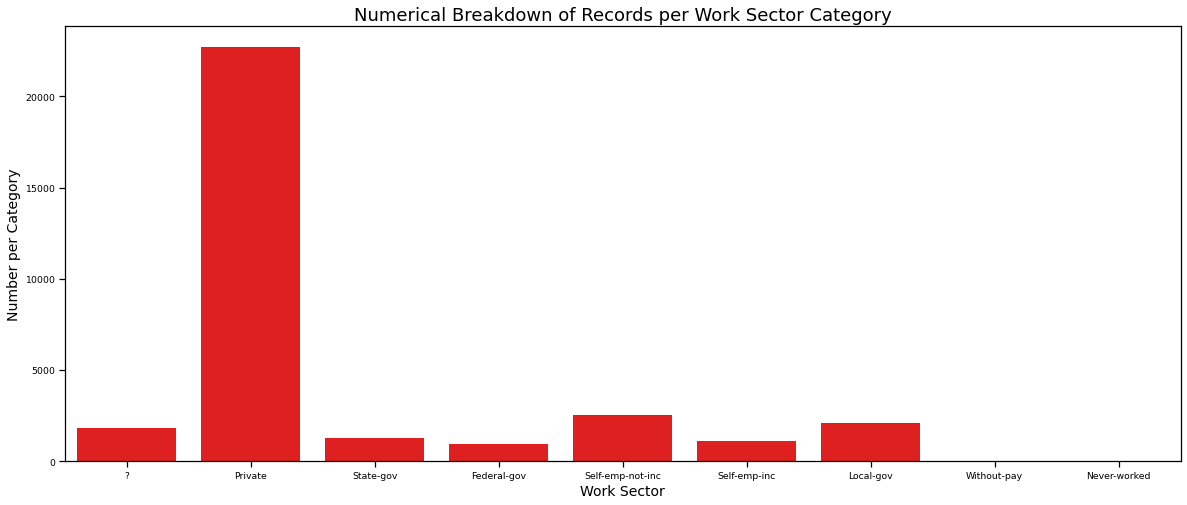

In [33]:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each "workclass" category:
sns.countplot(data=census_data, x = 'workclass', color = 'red')
# Make the axis labels more prominant:
plt.xlabel('Work Sector', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Work Sector Category", fontsize=18)

The vast majority of people work in the private sector. Government workers (combining Federal, State, and Local government employees) form the next largest category. I suspect that the "?" category originally contained null/NaN values and was specifically set to "?" so as to ensure that the data set would not contain null/NaN values. If my suspicion is true, it is interesting that null/NaN values were not set to "unknown" or "not_prov" (i.e., not provided) or something similar. <br>
The below plot splits the data by income level and plots the resulting bar plot of "workclass."

Text(0.5, 1.0, 'Numerical Breakdown of Records per Work Sector Category Split by Income')

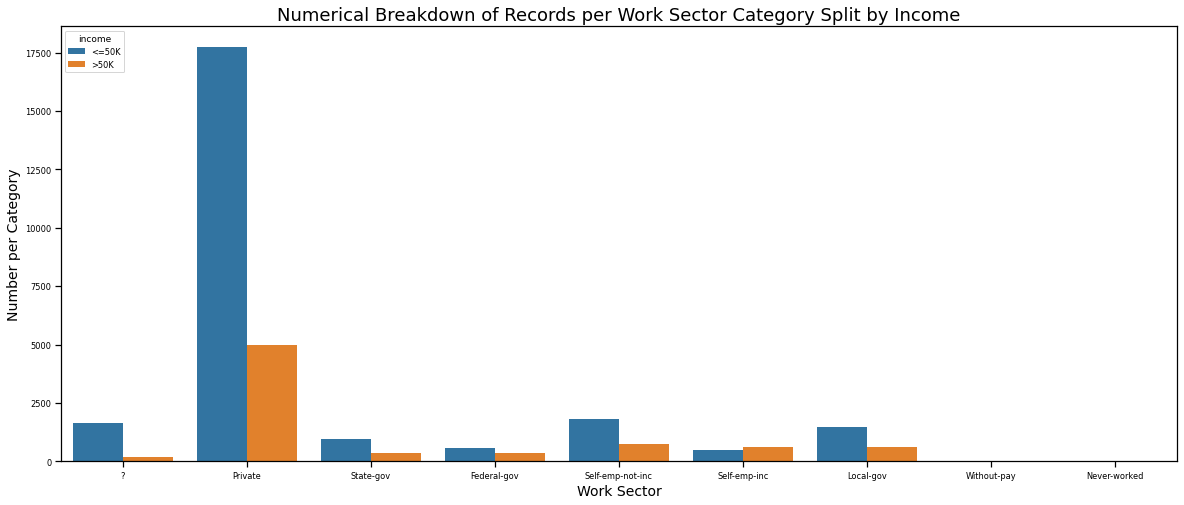

In [34]:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each "workclass" category, split by income level:
sns.countplot(data=census_data, x = 'workclass', hue = 'income')
# Make the axis labels more prominant:
plt.xlabel('Work Sector', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Work Sector Category Split by Income", fontsize=18)

Bearing in mind that the private sector had the most employees by far, it's not surprising to see that the private sector also has the most high-income records. However, estimating proportions by eye, it seems that the "Self-emp-inc" category has the highest proportion of high-income workers, followed by the "Fed-gov" category. The "Local-gov" and "Self-emp-not-inc" categories both seem to have proportions of high-income workers which are comparable to the proportion of private sector high-income workers, at least approximately. Thus, the private sector does not have the highest proportion of high-income workers even though it does have the most high-income records by raw count.

<h4> Looking at the Occupation Feature </h4> <br>
The next-to-last feature I investigated was "occupation." Even before plotting the bar plot of the occupation feature, I realized that it would be impractical to split it by income level; given the sheer number of occupations that one could report, the split bar plot would get unwieldy rapidly. As it turned out, there were 14 non-"?" categories of occupation, which was more than enough to make a bar plot split by income impractical but not as many categories as I was expecting. I decided to simply investigate the bar plot of occupations <b>not</b> split by income or any other variable, just to see which occupation-classes seemed to be the most popular. That bar chart is included below.

Text(0.5, 1.0, 'Numerical Breakdown of Records per Occupation Category')

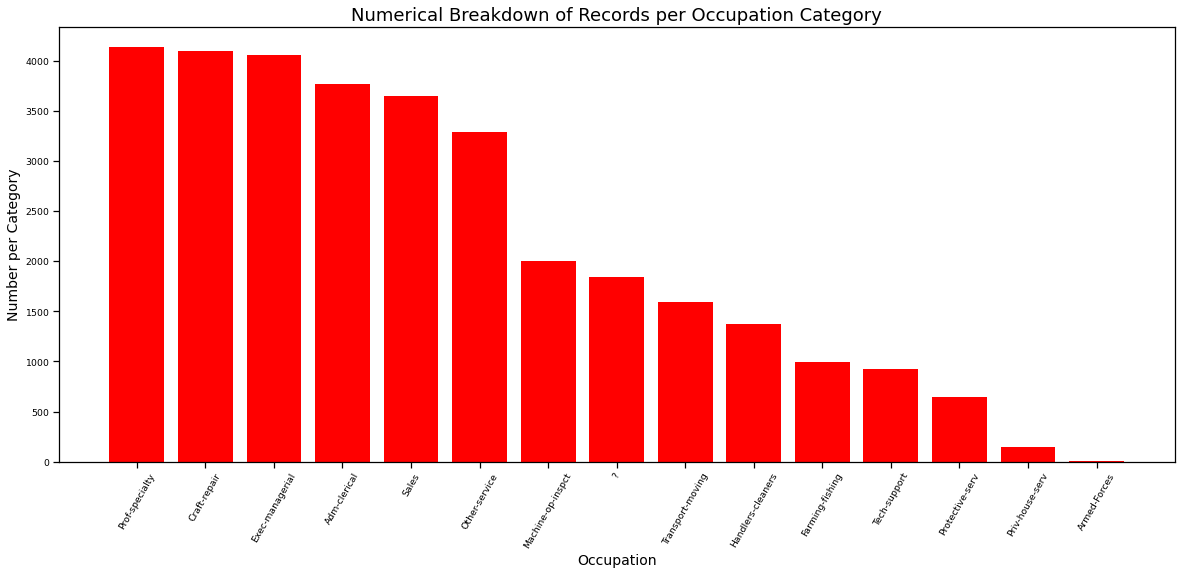

In [35]:
# Make a list of all occupation categories found in the data set:
occupations = ['Prof-specialty','Craft-repair','Exec-managerial','Adm-clerical','Sales','Other-service',\
               'Machine-op-inspct','?','Transport-moving','Handlers-cleaners','Farming-fishing',\
               'Tech-support','Protective-serv','Priv-house-serv','Armed-Forces']
# Set the figure size:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Construct a bar plot illustrating the breakdown of records in each occupation category:
plt.bar(occupations, census_data.occupation.value_counts(), color = 'red')
# Rotate the x-axis tickmarks to make them easier to read:
plt.xticks(rotation = 60)
# Make the axis labels more prominant:
plt.xlabel('Occupation', fontsize=14)
plt.ylabel("Number per Category", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per Occupation Category", fontsize=18)

The three most common occupation-classes were "Prof-specialty", "Craft-repair," and "Exec-managerial." A surprisingly large number of records fell into the "?" category; as discussed above, I suspect that "?" records were originally null/NaN and were assigned the value "?" so that the data set would not have null values. Very few people in the data set worked in the armed forces. I cannot say anything more than this, as I have no idea which specific occupations fell into which category (for example, as a former college professor, would I have been a "Prof-Specialty," "Other-service," or "?").

<h4> Looking at the Native Country Feature </h4> <br>
The last nominal categorical feature that I looked at was "native.country," which I assume contains the country each person reported as their native country, i.e. the country they were legally born in. There were 42 unique countries (or, in the case of U.S. outlying territories like Guam and Samoa, areas) reported, including "?". Of the 32,561 records in the data set, 29,170 of them reported the United States as their native country; this number overwhelms all other country-categories, which had anywhere from a handful to a few dozen to a few hundred at most. Therefore, plotting raw counts per category or even proportions per category as a bar chart would not be very informative; all other countries except the U.S. would be washed out. What I chose to do instead was to gather countries other than the United States by region--U.S. Territories, North America, Central America, the Caribbean, South America, Europe, mid-Asia, and East Asia--and assign each non-U.S. country to its appropriate region. The "country" "South" appeared in the countries-categories, and since I had no idea what "South" was short for I lumped it in with the "?" records to form an "unknown" grouping. <br>
Once I had the counts per region, I made three plots. One plot was a bar plot of the number of records per region; the second was a pie plot of the proportion of records per region; and the third was a pie plot of the proportion of records in the U.S. and the proportion of records from all other countries. The latter was probably the most informative plot. All three plots are included below.

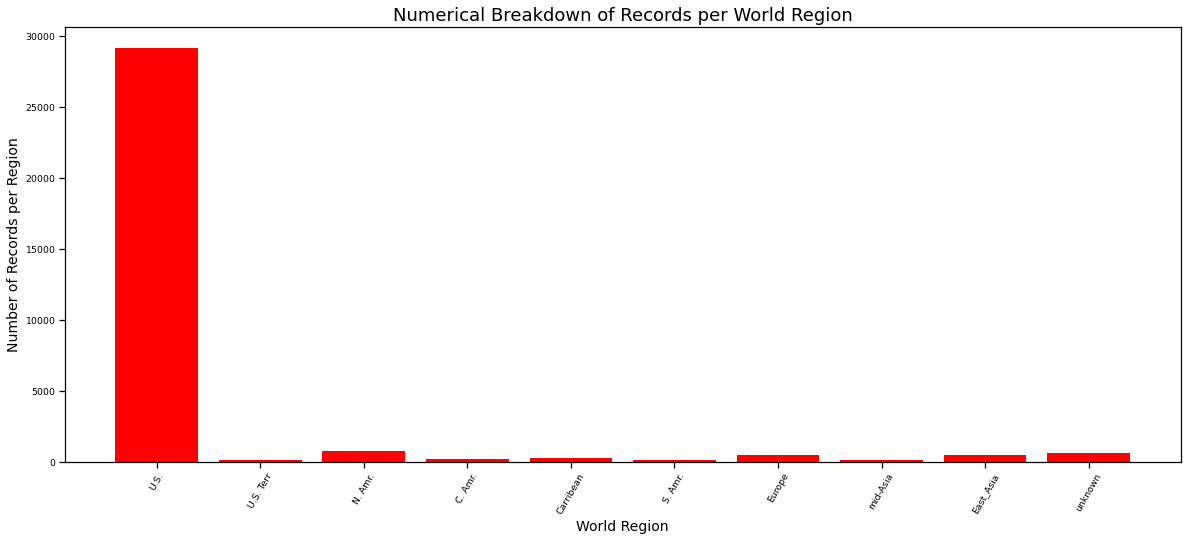

<Figure size 432x288 with 0 Axes>

In [36]:
# A list of the regions into which I broke the data:
native_country_regions = ['U.S.', 'U.S. Terr','N. Amr.','C. Amr.','Carribean', 'S. Amr.', 'Europe', 'mid-Asia', \
                          'East_Asia','unknown']

# Count the number of countries in each region, in the regional order listed above:
native_country_counts = [29170, 114+14, 121+643, 64+13+34+106, 95+70+81+44+19, 59+28+31, \
                         137+90+73+60+37+29+29+24+16+13+12+1, 100+43, 198+75+67+62+51+20+19+18+18, 583+80]

# Construct a bar plot of the number of records in each region:
# Set the figure size:
plt.figure(figsize=(20,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot the bar plot:
plt.bar(native_country_regions, native_country_counts, color = 'red')
# Rotate the x-axis tickmarks to make them more legible:
# Rotate the x-axis tickmarks to make them easier to read:
plt.xticks(rotation = 60)
# Make the axis labels more prominant:
plt.xlabel('World Region', fontsize=14)
plt.ylabel("Number of Records per Region", fontsize=14)
# Give the plot an informative, prominant title:
plt.title("Numerical Breakdown of Records per World Region", fontsize=18)
# Show the bar plot:
plt.show()
# Clear plot formatting:
plt.clf()

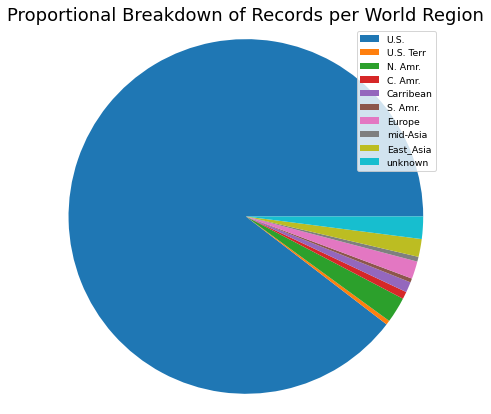

<Figure size 432x288 with 0 Axes>

In [37]:
# Convert the count of the number of countries in each region to a NumPy array for easier mathematical manipulation:
native_country_counts = np.array(native_country_counts)

# Construct a pie plot of the proportion of records in each region:
# Set the figure size:
plt.figure(figsize=(7,7))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot the pie plot:
plt.pie(native_country_counts/sum(native_country_counts))
# Make a legend:
plt.legend(native_country_regions, loc = 0)
# Set the axes to make the pie chart display appropriately:
plt.axis('equal')
# Give the plot an informative, prominant title:
plt.title("Proportional Breakdown of Records per World Region", fontsize=18)
# Show the plot:
plt.show()
# Clear plot formatting:
plt.clf()

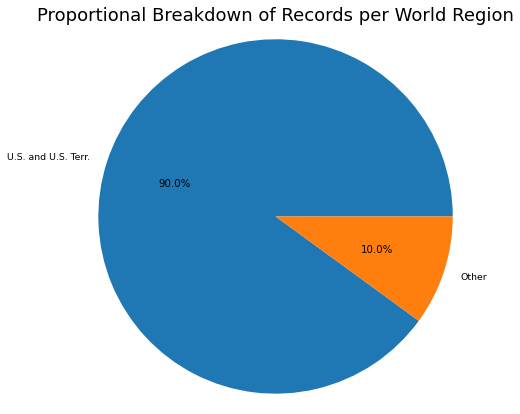

<Figure size 432x288 with 0 Axes>

In [38]:
# This time there are two regions: the U.S. and U.S. Territories, and all Other countries:
native_country_bimodal_regions = ['U.S. and U.S. Terr.', 'Other']
# Count the number of countries in each region, in the regional order listed above:
native_country_bimodal_counts = [29170+114+14,\
                                 121+643+64+13+34+106+95+70+81+44+19+59+28+31+137+90+73+60+37+29+29+24+16+13+12+1+\
                                 100+43+198+75+67+62+51+20+19+18+18+583+80]

# Convert the count of the number of countries in each region to a NumPy array for easier mathematical manipulation:
native_country_bimodal_counts = np.array(native_country_bimodal_counts)

# Construct a pie plot of the proportion of records in each region:
# Set the figure size:
plt.figure(figsize=(7,7))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot the pie plot, putting the region label alongside each "slice" and labeling each "slice" with the proportion
# of the data it represents:
plt.pie(native_country_bimodal_counts/sum(native_country_bimodal_counts), labels = native_country_bimodal_regions, \
        autopct = '%0.1f%%')
# Set the axes to make the pie chart display appropriately:
plt.axis('equal')
# Give the plot an informative, prominant title:
plt.title("Proportional Breakdown of Records per World Region", fontsize=18)
# Show the plot:
plt.show()
# Clear plot formatting:
plt.clf()

90% of the records list the United States or one of its territories as the native country; only 10% of the records list another country as the native country.

<h4> A Brief Remark About the "fnlwgt" Feature </h4> <br>
Upon reading <a href="https://www.kaggle.com/uciml/adult-census-income">the Kaggle file description</a>, I chose not to do anything with the "fnlwgt" feature.

<h3> <center> Building Predictive Supervised Machine Learning Models </center> </h3>
Exploratory analysis of the data revealed that the following features were associated with income level and should therefore be included in a supervised machine learning model aimed at predicting income:  hours.per.week, education.num, sex_binary, age, capital.gain, and capital.loss. Other nominal categorical variables were found to likely associate with income, but since they cannot be converted to quantitative values they cannot be included in the machine learning models I built. <br>
The income feature was found to be binary categorical, with the only two categories being low-income ("<=50K") and high-income (">50K"); the binary categorical nature of income opened up many possibilities for supervised machine learning models aimed at predicting whether a person makes over \$50,000 per year. Logistic regression models and support vector machine models in particular are well-suited to classifying binary categorical data; k-Nearest Neighbours classifiers, Decision Tree classifiers, and Random Forest classifiers are of course well suited for classifying binary categorical data as well, although they can readily handle a larger number of categories. I decided to explore all of the above classification models to see which one would perform "best" when asked to classify records by income. <br> <br>
My primary criterion for model evaluation to determine which one is "best" will be precision. I chose precision as my primary criterion because precision measures the percentage of true classifications of a particular type divided by the total number of classifications of that type made. Since the goal is to predict whether a person's income is over \$50,000 per year, the "type" that I am interested in is high-income records, and I would like my model to be as precise as possible; this means that the number of true classifications of income greater than \$50,000 is large and the number of false high-income classifications (i.e., the record was actually a low-income record but it was misclassified as being a high-income one) is as small as possible. In other words, the best model will have the lowest number of false positives for high-income records. My secondary criterion for model evaluation will be accuracy, which measures the total number of correctly classified records divided by the total number of records. Accuracy accounts for both false positives and false negatives, in addition to true positive and true negative classifications. Here, "positive" means income greater than \$50,000 per year, and "negative" means income less than or equal to \$50,000 per year. <br> <br>
In the cells below, I convert the binary categorical variables income and sex to values of 1 and 0; I then gather up the quantitative data which shall be used to train my models, split that data into training and validation sets, and scale the data such that all features are at about the same scale. From there, supervised machine learning models which predict a person's income level are "built" and evaluated.

<h4> Converting Binary Categorical Variables to Integers </h4> <br>
Since "income" and "sex" are both binary categorical variables, each can be mapped to integers (separately). In the case of "income," incomes with the label ">50K" will be mapped to "1," as these are the values I want my algorithm to find. Since there are only two options for income, it follows that incomes with the label "<=50K" will be mapped to "0." It is not as obvious how the feature "sex" should be mapped to integers, so I arbitrarily choose to map "Female" to "1" and "Male" to "0."

In [39]:
# Map <50K to 1; map <= 50K to 0 and put in in a new column (so as not to overwrite the actual income data):
census_data["income_binary"] = census_data.income.map({"<=50K": 0, ">50K": 1})
# Map Female to 1; map Male to 0 and put in in a new column (so as not to overwrite the actual income data):
census_data["sex_binary"] = census_data.sex.map({"Male": 0, "Female": 1})

# Print out the header again, to make sure nothing blatantly obvioius has gone wrong:
print(census_data.head(3))

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0                ?  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   
2                ?      Unmarried  Black  Female             0          4356   

   hours.per.week native.country income  income_binary  sex_binary  
0              40  United-States  <=50K              0           1  
1              18  United-States  <=50K              0           1  
2              40  United-States  <=50K              0           1  


<h4> Splitting the Data Into Training and Validation Sets </h4> <br>

In [40]:
# Gather all of the quantitative featues which will be used to predict income level:
pred_inc_data = census_data[['age','education.num','sex_binary','hours.per.week','capital.gain','capital.loss']]
# Gather all of the "labels"--i.e., income levels--into a separate Series:
pred_inc_target = census_data['income_binary']

In [41]:
# Divide the above data DataFrame and labels Series into training and validation sets. 75% of the data will used to 
# train the supervised machine learning models; the remaining 25% of data will be set aside to evaluate the models
# once they have been "built." An initial random state is chosen so that the same splitting of data/labels between
# training and validation sets is achieved each time this cell is run.
data_train, data_valid, target_train, target_valid = train_test_split(pred_inc_data, pred_inc_target, \
                                                                  train_size = 0.75, test_size = 0.25, random_state = 75)

# The full data set consists of about 76% low-income records and about 24% high-income records. Ensure that the same 
# percentage of low/high-income records exists in the training and validation sets. 
print('Training set percentage breakdown: low-income = 0, high-income = 1:')
print(target_train.value_counts()/len(target_train))
print('Validation set percentage breakdown: low-income = 0, high-income = 1:')
print(target_valid.value_counts()/len(target_valid))

# Ensure that all features are on the same scale; this is of vital importance to the linear regression and k-Nearest
# Neighbours algorithms, but is useful for the others as well. Use MinMaxScaler() to scale all data to lie between 
# 0 and 1.
mmscaler = MinMaxScaler()
scaled_data_train = mmscaler.fit_transform(data_train)
scaled_data_valid = mmscaler.transform(data_valid)

Training set percentage breakdown: low-income = 0, high-income = 1:
0    0.759582
1    0.240418
Name: income_binary, dtype: float64
Validation set percentage breakdown: low-income = 0, high-income = 1:
0    0.758015
1    0.241985
Name: income_binary, dtype: float64


<h4> "Building" the Supervised Machine Learning Models </h4> <br>

In [42]:
"""First, build a logistic regression classification model which predicts income level:"""

# Instantiate a LogisticRegression() object:
logistic_regressor = LogisticRegression()
# Train the model using the training data:
logistic_regressor.fit(scaled_data_train, target_train)
# Make predictions using the trained model:
lr_predictions = logistic_regressor.predict(scaled_data_valid)

# Print out the model's accuracy, precision, and recall scores:
print("L.R.C Model Accuracy: " + str(round(accuracy_score(target_valid,lr_predictions),3)))
print("L.R.C Model Precision: " + str(round(precision_score(target_valid,lr_predictions),3)))
print("L.R.C Model Recall: " + str(round(recall_score(target_valid,lr_predictions),3)))
# Print out the model's confusion matrix:
print("L.R.C Model Confusion Matrix: ")
print(confusion_matrix(target_valid,lr_predictions))

L.R.C Model Accuracy: 0.818
L.R.C Model Precision: 0.717
L.R.C Model Recall: 0.41
L.R.C Model Confusion Matrix: 
[[5852  319]
 [1162  808]]


The logistic regression classifier I built boasts good accuracy and precision, but bad recall. The confusion matrix reveals that, while the model can correctly classify high-income records as high-income, and does not misclassify many low-income records as high-income, it misclassifies more high-income records than it correctly classifies. In other words, it is more apt to "guess" that a record is low-income than it is high-income, thus making it very good at "finding" low-income records. Thus while the model's precision is good, 60% of high-income records go misclassified.

In [43]:
"""Next, build a support vector machine classification model which predicts income level.
The support vector machine classification algorithm in principle takes two free input parameters, namely the
regularization parameter 'C' and the kernel coefficient 'gamma.' Since I do not know beforehand which values
for C and gamma to use, I map out a small area of the C/gamma parameter space to determine which values of C 
and gamma result in the highest precision."""

# Initialize empty arrays to store precision, gamma, and C values:
scores = []
gees = []
cees = []

# loop over values of gamma:
for g in range(1,11):
    # loop over values of C:
    for c in range(1,21):
        # Divide the current value of c by 10 to get finer discrimination for the regularization parameter:
        c = c / 10.0
        # Instantiate a SVC() object with the current values of gamma and C:
        classes = SVC(kernel = 'rbf', gamma = g, C = c)
        # Train the object on the training data:
        classes.fit(scaled_data_train, target_train)
        # Make predictions using the trained model:
        classes_predictions = classes.predict(scaled_data_valid)
        # Calculate the model's precision and append it to the list of precision scores:
        scores.append(precision_score(target_valid, classes_predictions))
        # Append the current gamma and C values to their respective lists:
        gees.append(g)
        cees.append(c)

# Print out the index of the maximum precision score and what that precision score was:
print(scores.index(max(scores)), max(scores))
print(gees[16]) 
print(cees[16]) 

# Instantiate a SVC() object with the optimal input parameters for gamma and C:
svm_classifier = SVC(kernel = 'rbf', gamma = 1, C = 1.7)
# Train the object on the training data:
svm_classifier.fit(scaled_data_train, target_train)
# Make predictions using the trained model:
svm_predictions = svm_classifier.predict(scaled_data_valid)

# Print out the model's accuracy, precision, and recall scores:
print("SVMC Model Accuracy: " + str(round(accuracy_score(target_valid,svm_predictions),3)))
print("SVMC Model Precision: " + str(round(precision_score(target_valid,svm_predictions),3)))
print("SVMC Model Recall: " + str(round(recall_score(target_valid,svm_predictions),3)))
# Print out the model's confusion matrix:
print(confusion_matrix(target_valid,svm_predictions))

16 0.7674841053587648
1
1.7
SVMC Model Accuracy: 0.83
SVMC Model Precision: 0.767
SVMC Model Recall: 0.429
[[5915  256]
 [1125  845]]


Across the board, the support vector machine classification model I "built" is superior to my logistic regression classification model. It has higher accuracy, precision, and recall. It is better at correctly classifying both low-income records as low-income and high-income records as high-income, and misclassifies fewer of both categories. The support vector machine's recall is still objectively bad, because it is still misclassifying more high-income records than it correctly classifies. However, due to it misclassifying fewer low-income records as high-income, it has a superior precision. Overall, my support vector machine classification model is better than my logistic regression classification model and in fact is the highest accuracy and precision model that I "built."

In [44]:
""" Rather than explore a small area of gamma/C parameter space for an SVM classification model, try setting to the
default value of gamma (i.e., "scale"), and instead of giving an explicit value of C use class_weight = 'balanced'."""

# instantiate an object of the SVC class using the default value of gamma and a class_weight instead of a value for C:
svm_fixed_classifier = SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced')
# Train the object on the training data:
svm_fixed_classifier.fit(scaled_data_train, target_train)
# Make predictions using the trained model:
svm_fixed_predictions = svm_fixed_classifier.predict(scaled_data_valid)

# Print out the model's accuracy, precision, and recall scores:
print("SVMC Model Accuracy: " + str(round(accuracy_score(target_valid,svm_fixed_predictions),3)))
print("SVMC Model Precision: " + str(round(precision_score(target_valid,svm_fixed_predictions),3)))
print("SVMC Model Recall: " + str(round(recall_score(target_valid,svm_fixed_predictions),3)))
# Print out the model's confusion matrix:
print(confusion_matrix(target_valid,svm_fixed_predictions))

SVMC Model Accuracy: 0.757
SVMC Model Precision: 0.499
SVMC Model Recall: 0.796
[[4594 1577]
 [ 401 1569]]


This support vector machine classifier has good accuracy but terrible precision. However, it has an impressive recall. A look at the model's confusion matrix reveals that it is quite good at correctly classifying high-income records as such, and mis-classifies a very small number of high-income records. However, the number of low-income records misclassified as high-income ones is higher than the number of correctly classified high-income records. The model is more likely to guess that a record is high-income than either of the previous two models were, which means that it is worse at correctly classifying low-income records; this tendency is driving the model precision down, while boosting the recall. This model is good if the aim is to minimize false negatives, but bad if the aim is to minimize false positives. Since I am focusing on the latter, this model is the worst of the ones I "built."

In [45]:
"""Now build a k-Nearest Neigbhours classification model which predicts income level.
The k-Nearest Neighbours algorithm takes one input parameter: k, the number of nearest neighbours to look at when trying  
to decide on the classification of a data point. This is often not known ahead of time. Thus, I explore a few hundred 
possible choices to determine which one results in the highest precision."""

# empty arrays to hold precision and accuracy scores:
precision_all = []
accuracy_all = []

# Loop over a range of ks and store the resulting model accuracy score:
for k in range(1,601):
    # Instantiate a KNeighborsClassifier() object with the current value of k:
    classifier = KNeighborsClassifier(n_neighbors = k)
    # Train the object on the training data:
    classifier.fit(scaled_data_train, target_train)
    # Make predictions using the trained model:
    predictions = classifier.predict(scaled_data_valid)
    # Calculate the model's precision and append it to the list of precision scores:
    precision_all.append(precision_score(target_valid, predictions))
    # Calculate the model's accuracy and append it to the list of precision scores:
    accuracy_all.append(accuracy_score(target_valid, predictions))

# print out the k which resulted in the model with the highest accuracy score:
print(precision_all.index(max(precision_all))+1)

26


Text(0.5, 1.0, 'Precision of KNN model as a Function of k')

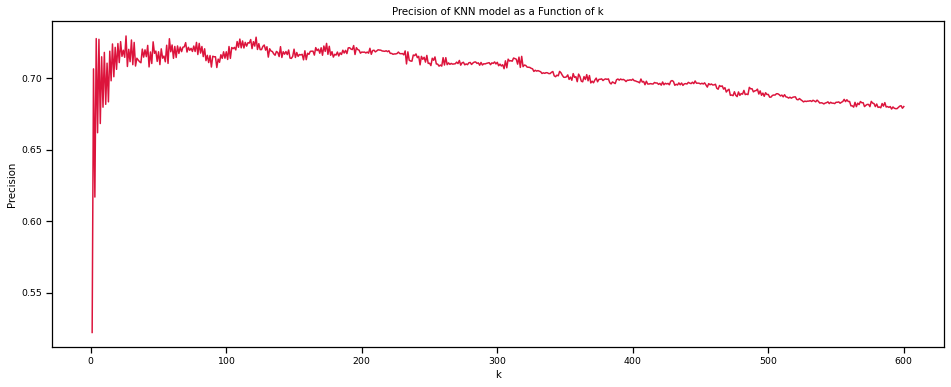

In [46]:
# Investigate how precision changes with the number of nearest neighbours averaged over:
plt.figure(figsize=(16,6))
# Set "context" of notebook to control the font size of tick labels:
plt.plot(range(1,601),precision_all, color = 'crimson')
plt.ylabel('Precision')
plt.xlabel('k')
plt.title('Precision of KNN model as a Function of k')

There is an initial sharp rise in precision as k increases; and while precision undergoes minor fluctuations around 0.71 or so from a k of about 50 to a k of about 200, precision decreases with increasing k beyond that point. This behaviour of decreasing precision with increasing k is about what I expect, as the model becomes underfit at very large k values. A similar trend of accuracy with k occurs, as seen below. The behaviour observed is what I would expect to see.

Text(0.5, 1.0, 'Accuracy of KNN model as a Function of k')

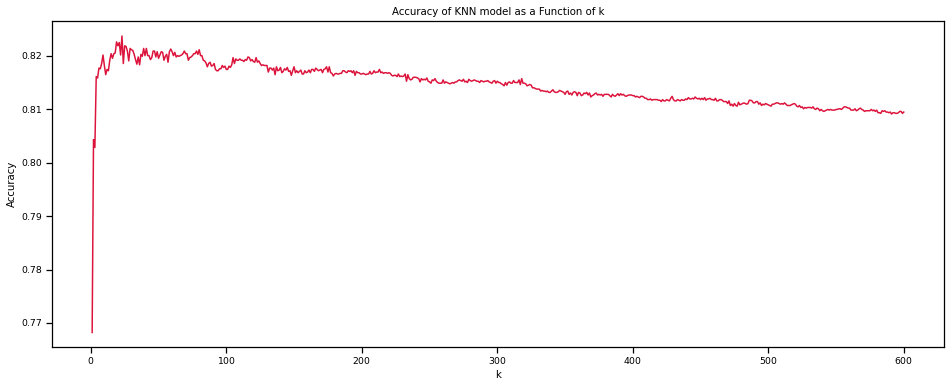

In [47]:
# Investigate how accuracy changes with the number of nearest neighbours averaged over:
plt.figure(figsize=(16,6))
# Set "context" of notebook to control the font size of tick labels:
plt.plot(range(1,601),accuracy_all, color = 'crimson')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.title('Accuracy of KNN model as a Function of k')

In [48]:
# Now that the optimum k has been found, instantiate a KNeighborsClassifier with the optimum k as its input parameter:
knn_classifier = KNeighborsClassifier(n_neighbors = precision_all.index(max(precision_all))+1)
# Train the object on the training data:
knn_classifier.fit(scaled_data_train, target_train)
# Make predictions using the trained model:
knn_predictions = knn_classifier.predict(scaled_data_valid)

# Print out the model's accuracy, precision, and recall scores:
print("KNNC Model Accuracy: " + str(round(accuracy_score(target_valid,knn_predictions),3)))
print("KNNC Model Precision: " + str(round(precision_score(target_valid,knn_predictions),3)))
print("KNNC Model Recall: " + str(round(recall_score(target_valid,knn_predictions),3)))
# Print out the model's confusion matrix:
print(confusion_matrix(target_valid,knn_predictions))

KNNC Model Accuracy: 0.822
KNNC Model Precision: 0.729
KNNC Model Recall: 0.419
[[5865  306]
 [1145  825]]


Like my logistic regression classifier and my first support vector machine classifier, my k-Nearest Neighbours classifier has good accuracy and precision. And like those previous two models, my k-Nearest Neighbours classifier has terrible recall. It misclassifies more low-income and high-income records than the support vector machine classifier did, but not as many as the logistic regression classifier did. This means that it correctly classifies more records than the logistic regression classifier, but fewer than the support vector machine classifier. In terms of my primary criterion for model goodness (precision), the k-Nearest Neighbours classification model I "built" is the second-best model.

In [49]:
"""Next, build a decision tree classification model which predicts income level."""

# Instantiate a DecisionTreeClassifier() object, specifying a random state to ensure deterministic behaviour during fitting:
classatree = DecisionTreeClassifier(random_state = 74)
# Train the object on the training data:
classatree.fit(scaled_data_train, target_train)
# Make predictions using the trained model:
classatree_predictions = classatree.predict(scaled_data_valid)

# Print out the model's accuracy, precision, and recall scores:
print("D.T.C Model Accuracy: " + str(round(accuracy_score(target_valid,classatree_predictions),3)))
print("D.T.C Model Precision: " + str(round(precision_score(target_valid,classatree_predictions),3)))
print("D.T.C Model Recall: " + str(round(recall_score(target_valid,classatree_predictions),3)))
# Print out the model's confusion matrix:
print(confusion_matrix(target_valid,classatree_predictions))

D.T.C Model Accuracy: 0.819
D.T.C Model Precision: 0.669
D.T.C Model Recall: 0.499
[[5684  487]
 [ 987  983]]


The decision tree classification model that I "built" has good accuracy, but mediocre precision and recall. A look at the confusion matrix reveals why this is. My decision tree classifier is very good at correctly classifying low-income records as such, and misclassifies very few low-income records as high-income. However, the model misclassifies as many high-income records as it correctly classifies. The low rate of misclassification of low-income records as high-income helps boost the decision tree classifier's precision. It is better balanced between precision and recall than the previous models I "built," which given the specific question at hand could be considered a mark in its favour.

In [50]:
""" Finally, build a random forest classification model which predicts income level.
A random forest classification algorithm accepts one free parameter, namely the number of decision trees in the
random forest. Rather than the default value of 100, I opted to use a large number of trees for my forest so as
to try and minimize overfitting."""

# Instantiate a RandomForestClassifier() object, 
forest = RandomForestClassifier(n_estimators = 5000, random_state = 74)
forest.fit(scaled_data_train, target_train)
forest_predictions = forest.predict(scaled_data_valid)

# Print out the model's accuracy, precision, and recall scores:
print("R.F.C Model Accuracy: " + str(round(accuracy_score(target_valid,forest_predictions),3)))
print("R.F.C Model Precision: " + str(round(precision_score(target_valid,forest_predictions),3)))
print("R.F.C Model Recall: " + str(round(recall_score(target_valid,forest_predictions),3)))
# Print out the model's confusion matrix:
print(confusion_matrix(target_valid,forest_predictions))

R.F.C Model Accuracy: 0.828
R.F.C Model Precision: 0.693
R.F.C Model Recall: 0.517
[[5720  451]
 [ 952 1018]]


My random forest classifier performs slightly better across the board than my single decision tree classifier did. It has slightly higher accuracy, precision, and recall than the single decision tree classifier, and misclassifies fewer records--whether low-income or high-income--than the single decision tree classifier did. This improvement in misclassification rates drives my random forest classification model's higher recall and precision, and makes it a slightly better-balanced model than the single decision tree classifier I "built." In terms of striking a balance between minimizing false positives while also minimizing false negatives, it is the best model that I "built." However, in terms of my primary criterion for model "goodness," it is the fourth-best model that I built.

<h3> <center> Conclusions </center> </h3>
The goal of this project was to determine whether a person makes over \$50,000 a year (in 1994 U.S. Dollars). Exploratory data analysis revealed that hours worked per week, biological sex, highest education level attained, capital gains, capital losses, and age were all associated with income. Using these quantitative data (once biological sex was mapped to 1 or 0), several supervised machine learning models were built to predict income level (which was entered in the data as either "<=50K" or ">50K"). The primary criterion for model performance was precision; the secondary criterion was accuracy. <br>
A support vector machine classification model with a precision of 76.7% and an accuracy of 83% was the most successful of the models built. While this model has a low false positive rate, its false negative rate is higher; the model suffers from low recall. This is a decided drawback of the model. <br>
In terms of balance between false positives and false negatives, a random forest model with an accuracy of 82.8% is an attractive option. While its precision is noticeably lower at 69.3%, its recall is higher, meaning that it correctly classifies more high-income records than the support vector machine classifier did. While the random forest model does not meet my primary criterion for model success, it is an attractive option if fewer false negatives are a priority. 

<h3> <center> What I Would Do Differently </center> </h3>
I was able to construct two passable models with similar accuracies, but different strengths: my support vector machine classifier had good precision but terrible recall, while my random forest classifier had mediocre precision <i>and</i> recall. However, I did not make use of a number of features which seem to be associated with income (race and "workclass" in particular--marital status and relationship are both associated with income but are likely dependent on each other) because they could not be quantified. Investigating a classification model which could make use of nominal categorical data would be the number one thing I would do differently if repeating this project. I would probably start by looking at a Naïve Bayes classifier, although I am sure that is far from the only option for such an algorithm. <br>
Additionally, it is clear to me that exploring different areas of the gamma/C parameter space of the support vector machine model trained on this particular data leads to very different outcomes. Using the default value of gamma and a reasonable choice for class_weight led to a very different model in terms of precision and recall than using the values which resulted from finding the maximum precision of a loop over small-valued gammas and Cs. I chose the small area of parameter space that I did for practical reasons: trying many combinations of gamma and C takes a lot of computational time, and time spent trying to explore a wider area of parameter space is time that I could be trying other models or improving existing ones. Exploring a wider area of the gamma/C parameter space for the support vector machine model is the second thing I would do differently if repeating this project. Perhaps my present values of gamma and C are a local maximum rather than a global maximum; if that is true, a better model exists, and more exploration of the parameter space could reveal it.

<h3> <center> Citations </center> </h3>
The following paper was cited by UCI Machine Learning in their file description: <br>
Ron Kohavi, <a href=http://robotics.stanford.edu/~ronnyk/nbtree.pdf> "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid"</a>, Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996. The link takes one directly to a PDF copy of the paper. <br>
After completing my project, I came across <a href="http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf">this</a> stellar write-up from (then) UCSD students Chet Lemon, Chris Zelazo, and Kesav Mulakaluri. Their treatment of the problem no doubt influenced my own write-up of my work. <br>
I utilized several tools from the <a href = "https://scikit-learn.org/stable/index.htmlScikit-learn"> scikit-learn Python machine learning library</a>; they request that the following paper be cited if their tools are used for a project: <br>
Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011 